<a href="https://colab.research.google.com/github/raymundojavajr/Deep_Learning_Pytorch/blob/main/Iris_Classification_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### Create Model

In [39]:
# Create Model
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [40]:
torch.manual_seed(32)
model = Model()

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np


### Load data

In [42]:
# Load data
url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
df['species'] = df['species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0.0, 1.0, 2.0])

### Train Test Split

In [44]:
x = df.drop('species', axis=1).values
y = df['species'].values

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

In [47]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

### Measure the error

In [48]:
# Measure the error
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [49]:
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(x_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())

    if i%10 == 0:
        print(f'Epoch: {i} Loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 1.169895887374878
Epoch: 10 Loss: 0.9578844308853149
Epoch: 20 Loss: 0.7988812923431396
Epoch: 30 Loss: 0.634953498840332
Epoch: 40 Loss: 0.44043001532554626
Epoch: 50 Loss: 0.291716992855072
Epoch: 60 Loss: 0.17829042673110962
Epoch: 70 Loss: 0.11587586998939514
Epoch: 80 Loss: 0.08928147703409195
Epoch: 90 Loss: 0.07743765413761139


Text(0.5, 0, 'Epoch')

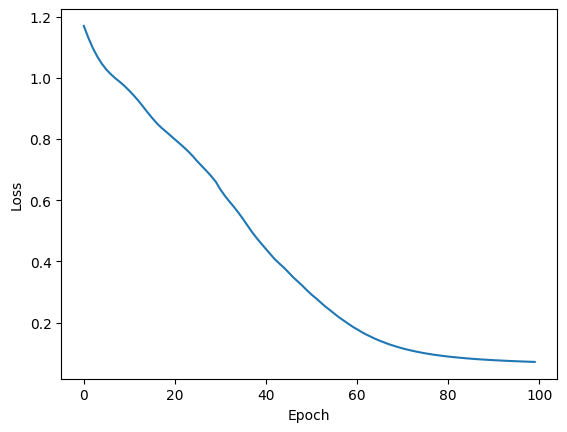

In [50]:
# Graph
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

### Evaluate Model

In [51]:
# Evaluate Model
with torch.no_grad():
    y_eval = model.forward(x_test)
    loss = criterion(y_eval, y_test)

print(loss)

tensor(0.0539)


In [52]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(x_test):
        y_val = model.forward(data)

        if y_test[i] == 0.0:
            species = 'Iris-setosa'
        elif y_test[i] == 1.0:
            species = 'Iris-versicolor'
        else:
            species = 'Iris-virginica'

        print(f'{i+1:2}. {str(y_val)} {y_test[i]} {y_val.argmax().item()}')

        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-3.3580,  3.9452,  0.3616]) 1 1
 2. tensor([  7.5862,   1.1113, -11.3861]) 0 0
 3. tensor([  6.6288,   1.5092, -10.4603]) 0 0
 4. tensor([-3.3304,  4.2647,  0.0569]) 1 1
 5. tensor([-7.3705,  2.8135,  5.1481]) 2 2
 6. tensor([-7.3749,  3.9061,  4.2781]) 2 2
 7. tensor([  6.2304,   1.6527, -10.0543]) 0 0
 8. tensor([  6.8783,   1.4056, -10.7016]) 0 0
 9. tensor([-2.6728,  4.3138, -0.6444]) 1 1
10. tensor([  7.2201,   1.3890, -11.1494]) 0 0
11. tensor([-3.8269,  4.4110,  0.5165]) 1 1
12. tensor([-8.6886,  1.9990,  6.9012]) 2 2
13. tensor([-2.0605,  3.8275, -0.7672]) 1 1
14. tensor([-1.0676,  4.3809, -2.2975]) 1 1
15. tensor([-7.5000,  2.6230,  5.3318]) 2 2
16. tensor([-8.6214,  1.5491,  7.1280]) 2 2
17. tensor([-3.7724,  3.6503,  0.9422]) 1 1
18. tensor([-6.7624,  2.7791,  4.5289]) 2 2
19. tensor([-1.6978,  4.2047, -1.4772]) 1 1
20. tensor([  7.8104,   1.3824, -11.9435]) 0 0
21. tensor([  6.9175,   1.5954, -10.9322]) 0 0
22. tensor([-9.4323,  2.7058,  7.2346]) 2 2
23. tensor(

In [53]:
new_iris = torch.tensor([[5.6, 3.0, 4.5, 1.5]])

In [56]:
with torch.no_grad():
    species = model.forward(new_iris)

### Save and Load Model

In [64]:
# Save our NN Model
torch.save(model.state_dict(), 'iris_nn.pt')

In [60]:
# Load our NN model
new_model = Model()
new_model.load_state_dict(torch.load('iris_nn.pt'))

<All keys matched successfully>

In [61]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)